 #### Section B

I will showcase Customer Segmentation for this task.

Customer segmentation refers to grouping customers that share similar characteristics into one group. Customer segmentation is useful becuase a company can communicate targeted marketing messages that will resonate with specific groups. A company can identify ways to improve products and services to suite a certain group of customers. A company can also test pricing options. 

This task will make use of K-means clustering. The mall customers dataset can be obtained from [here](https://drive.google.com/file/d/19BOhwz52NUY3dg8XErVYglctpr5sjTy4/view).

In [1]:
# Import dependencies

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv', index_col=0)
print('Data:')
print(df.head(), end='\n\n')

# check if there are missing values
print(df.isnull().sum(), end='\n\n')

# check if there are non-numerical features
print(df.info())

Data:
            Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)

This dataset contains four columns; Gender, Age, Annual income and Spending Score of each customer. There are no missing values in this dataset.

### Explore the dataset a bit further

<AxesSubplot:xlabel='Gender', ylabel='Count'>

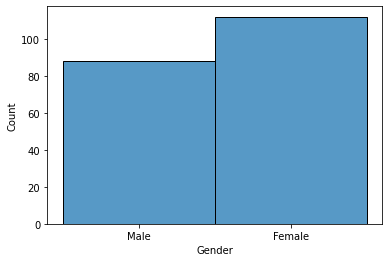

In [3]:
# View the proportion of females and males within the dataset
sns.histplot(data=df, x='Gender')

The data contains more female customers than males.

In [4]:
# Obtain the summary of the dataset
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Age', ylabel='Gender'>

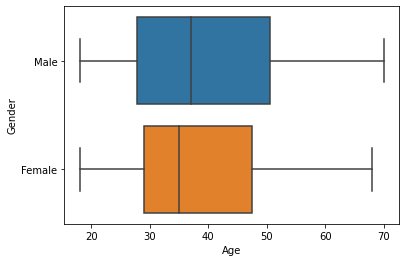

In [5]:
# Plot a boxplot to view the age distribution between females and males
sns.boxplot(data=df, x='Age', y='Gender')

The oldest customer is male. The average age of the female customers is lower than that of the male customers

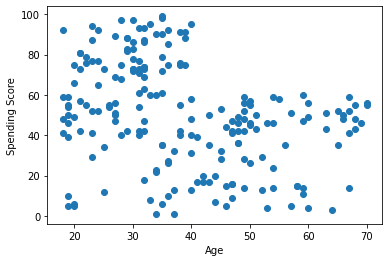

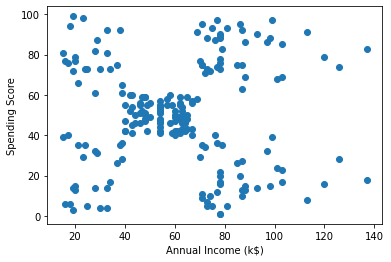

In [6]:
# explore the continuous independent features (Age and Annual Income)

for f in df.columns[1:-1]:
  plt.scatter(df[f], df['Spending Score (1-100)'])
  plt.xlabel(f)
  plt.ylabel('Spending Score')
  plt.show()

The Annual Income feature clearly seems to naturally divide the data into 5 clusters. Since these are clusters are quite distinct we will use this feature to perform clustering on.

#### Choose 'K'

In [7]:
# prepare data for training
X = df[['Annual Income (k$)','Spending Score (1-100)']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

Data size:
(200, 2)


To obtain the optimal value of k to use for the KMeans clustering, make use of the elbow method. This method creates a plot with the number of clusters on the x-axis and the total within sum of squares on the y-axis. The point on the x-axis where the elbow appears gives the optimal number of clusters to use. 

C:\Users\natacha\Documents\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


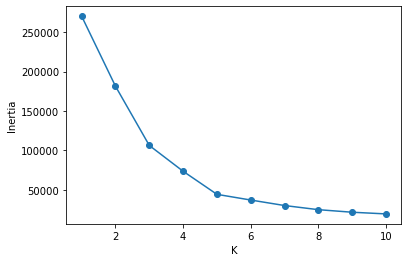

In [8]:
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=123):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(X)


The elbow runs from k=3 to k=5. In cases like this, it is not always clear which value within the elbow is the most optimal, so we can investigate likely candidates further using the silhouette score.

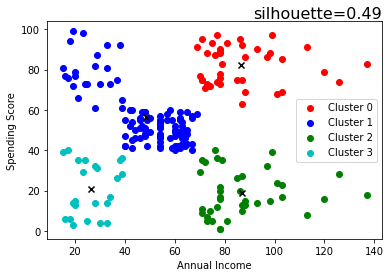

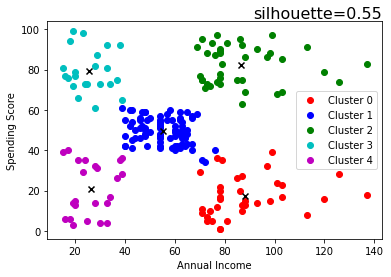

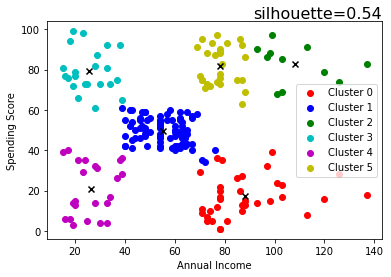

In [9]:
def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

for k in range(4,7):
  scatter_Kmeans(X, k, r=0)

The silhouette score evaluates the quality of clusters. This score varies from -1 to 1. A score of 1 means that the cluster is well separated from others. A score of 0 represents overlapping clusters and a score of -1 indicates that some data points may have been assigned to the wrong clusters.
Thus we see that the best silhouette score (score = 0.55) is actually achieved using k=5.

From the visualization, second plot above, there is a distribusion of 5 clusters.
The clusters represent the following:

Cluster 0 - This cluster denotes a high annual income and low yearly spend.

Cluster 1 - This cluster represents the customers with the medium income salary as well as the medium annual spend of salary.

Cluster 2 - This cluster represents the customers having a high annual income as well as a high annual spend.

Cluster 3 - This cluster represents a low annual income but its high yearly expenditure.

Cluster 4 - This cluster denotes the customers with low annual income as well as low yearly spend of income.    